# Implement Your Machine Learning Project Plan

In this lab you will implement the machine learning project plan you created in the assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Create features and a label, and prepare your data for your model.
3. Fit your model to the training data and evaluate your model. 
4. Show how you've improved upon your baseline model.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import the additional packages that you will need for this task (only import packages that you have used in this course).

In [2]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Load the Data Set


You have chosen to work with one of three data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultDataFull.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is location in file `WHR2018Chapter2OnlineData.csv`

<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0) 
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [5]:
# YOUR CODE HERE

#1. Dropping all NULL values from my chosen features and labels
df = df.dropna(subset=["Freedom to make life choices", "Democratic Quality", "Confidence in national government", "Healthy life expectancy at birth"])
df_sub = df[["Freedom to make life choices", "Democratic Quality", "Confidence in national government", "Healthy life expectancy at birth"]].copy()

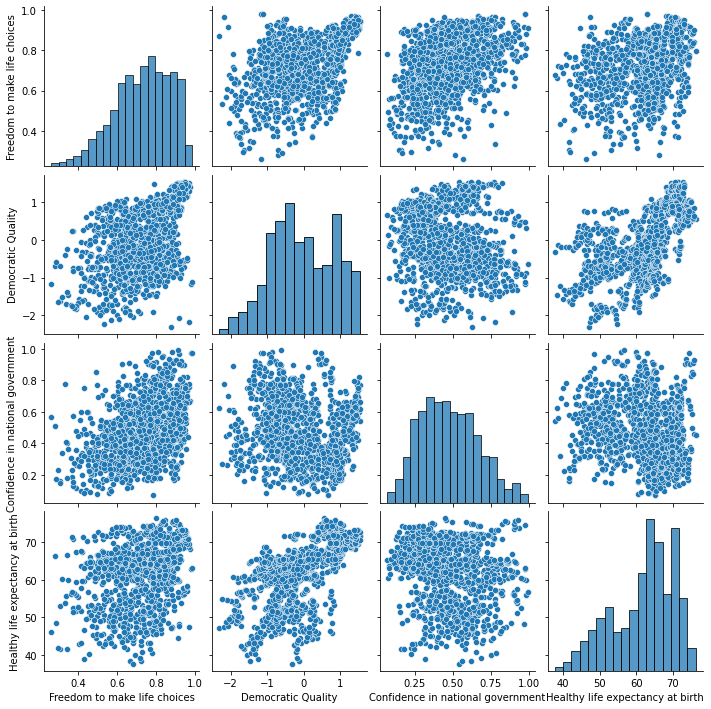

In [6]:
#2. I will now visualize my chosen features and compare their correlation values with the label
sns.pairplot(data=df_sub)

In [9]:
#3. I will now create my labeled examples to prepare the training data
features = ["Democratic Quality", "Confidence in national government", "Healthy life expectancy at birth"]
X = df[features]
y = df["Freedom to make life choices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
#4. I will now create and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

In [11]:
#5. I will produce a model summary using the model I just created
print('Linear Regression Model Summary:\n')

print('Intercept:')
print('alpha = ' , model.intercept_)

print('\nFeature Weights:')
i = 0
for w in model.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

Linear Regression Model Summary:

Intercept:
alpha =  0.39808386570325277

Feature Weights:
w_ 1 =  0.0722431620173154  [ weight of  Democratic Quality ]
w_ 2 =  0.3576995759846928  [ weight of  Confidence in national government ]
w_ 3 =  0.00266330307853474  [ weight of  Healthy life expectancy at birth ]


In [13]:
#6. Now I will evaluate the model's perforamnce using RMSE and r2

print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, model_predictions)))

print(' R^2 =   %.2f'
      % r2_score(y_test, model_predictions))


Model Performance

RMSE =   0.10
 R^2 =   0.50


In [30]:
#We see that the model has some decent performance, now we will try to optimze using a grid search with a SGD regressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.linear_model import SGDRegressor

In [23]:
SGD_model = SGDRegressor()
SGD_model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
#Taking a look at what hyperparameters we have to work with
SGD_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [25]:
#Performing a Grid search to optimize our hyperparameters
param_grid_LR = {
    'loss': ["squared_loss", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
    'learning_rate': ["constant", "optimal", "invscaling"]
}

param_grid_LR

{'learning_rate': ['constant', 'optimal', 'invscaling'],
 'loss': ['squared_loss',
  'huber',
  'epsilon_insensitive',
  'squared_epsilon_insensitive']}

In [42]:
print('Running Grid Search...')

grid_LR = GridSearchCV(SGD_model, param_grid_LR, cv=3)

grid_search_LR = grid_LR.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [43]:
grid_search_LR.best_params_

{'learning_rate': 'invscaling', 'loss': 'huber'}

In [64]:
SGD_best_model = SGDRegressor(loss='huber', learning_rate='invscaling')
SGD_best_model.fit(X_train, y_train)
SGD_model_predictions = SGD_best_model.predict(X_test)

In [65]:
#6. Now I will evaluate the model's perforamnce using RMSE and r2

print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, SGD_model_predictions)))
print(' R^2 =   %.2f'
      % r2_score(y_test, SGD_model_predictions))


Model Performance

RMSE =   0.31
 R^2 =   -3.53


In [66]:
#Unfortunately, our model did not improve so we will need to go back and reselect our features
df_sub.corr().head()

,Freedom to make life choices,Democratic Quality,Confidence in national government,Healthy life expectancy at birth
Freedom to make life choices,1.000000,0.482264,0.405760,0.364552
Democratic Quality,0.482264,1.000000,-0.142764,0.644942
Confidence in national government,0.405760,-0.142764,1.000000,-0.182037
Healthy life expectancy at birth,0.364552,0.644942,-0.182037,1.000000


In [88]:
features = ["Democratic Quality", "Confidence in national government"]
X = df[features]
y = df["Freedom to make life choices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [89]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
model2_predictions = model2.predict(X_test)

In [90]:
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, model2_predictions)))

print(' R^2 =   %.2f'
      % r2_score(y_test, model2_predictions))


Model Performance

RMSE =   0.11
 R^2 =   0.48


In [ ]:
#We see that is performance is significantly better than our SGD model, but had a similar performance to our original baseline model
"""
According to our baseline model, our predictions were off by .10 units (RMSE) and our model was able to make predictions about 50% of the time (R2).
While this isn't a great model, our attempts to optimize this model shows that the baseline is the best we can do with the current features we have. 
This also goes to show that our selected features don't strongly correlate with the label but shows that there isn't a strong connection between quality of life and government system in this dataset
"""